In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
%matplotlib notebook
init_printing()

In [3]:
def plot_curve(r_vec, t_range, npts=100, fig=None):
    """Plot a parametric curve in R**3"""
    if fig is None:
        fig = plt.gcf()
    ax = fig.gca(projection='3d')
    
    x, y, z = r_vec
    t_num = np.linspace(float(t_range[0]), float(t_range[1]), npts)
    x_num = lambdify(t, x, "numpy")
    y_num = lambdify(t, y, "numpy")
    z_num = lambdify(t, z, "numpy")

    ax.plot(x_num(t_num), y_num(t_num), z_num(t_num))
    return ax

In [4]:
def tangent(r_vec, t):
    r_vec = Matrix(r_vec)
    t_vec = r_vec.diff(t)/r_vec.norm() 
    return simplify(t_vec)

In [5]:
def curvature(r_vec, t):
    r_vec = Matrix(r_vec)
    dr = r_vec.diff(t)
    dr2 = r_vec.diff(t, t)
    curv = sqrt(dr.dot(dr)* dr2.dot(dr2) - dr.dot(dr2)**2)/dr.dot(dr)**(S(3)/2)
    return simplify(curv)

In [6]:
r, c = symbols("r c", real=True, positive=True)

In [7]:
t = symbols("t", real=True)
r_vec = (1 + cos(t), 1 + sin(t), 1 - sin(t) - cos(t))

<IPython.core.display.Javascript object>


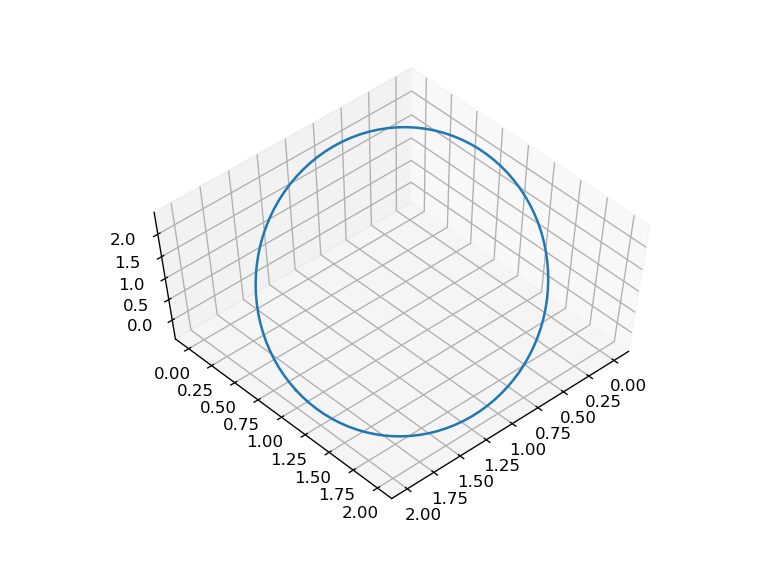

In [8]:
plt.figure()
plot_curve(r_vec, (0, 2*pi))
plt.show()

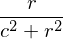

In [9]:
curvature((r*cos(t), r*sin(t), c*t), t)